In [4]:
student_name = "Steven Gok Qiu Yuan"
student_id = "44066139"

In [5]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
matplotlib.style.use('ggplot')
from sklearn import metrics 
%matplotlib inline

# COMP257 Week 7 Logisitic Regression

Logistic Regression is a powerful and heavily used algorithm that performs very well on a wide range of problems.  Such as modelling population growth, survival from a disease, the spread of a disease or even a probability of a change in  behaviour under a certain condition.

In linear regression, we used a set of input variables to predict the value of a continuous response variable.

In logistic regression, we use a set of input variables to predict probabilities of class membership.  This can be used to work out the probability of some event happening versus the probability of it not happening (odds ratio). 

Logistic regression is a method for fitting a regression curve, y = f(x), when y consists of proportions or probabilities, or binary coded (0,1--failure, success) data. When the response is a binary (dichotomous) variable, and x is numeric, logistic regression fits a logistic curve to the relationship between x and y. The logistic curve is an S-shaped or sigmoid curve which we will plot below.

The logistic regression model takes real-valued inputs and makes a prediction as to the probability of the input belonging to the default class (class 0).

If the probability is > 0.5 we can take the output as a prediction for the default class (class 0), otherwise the prediction is for the other class (class 1).

Unlike linear regression, the output is transformed into a probability using the logistic function:

$p(class=0) = 1 / (1 + e^{-output})$
 
In this lab we will examine and construct simple logistic regression models using different python modules and the iris data set from week 5.

# Logistic Function

Before we dive into logistic regression, let’s take a look at the logistic function, the heart of the logistic regression technique.

The logistic function is defined as:

$transformed = 1 / (1 + e^{-x})$

Where e is the numerical constant Euler’s number and x is a input we plug into the function.

Let’s plug in a series of numbers from -5 to +5 and see how the logistic function transforms them:

In [6]:
dataset = [-5,-4,-3,-2,-1,0,1,2,3,4,5]
stats.logistic.cdf(dataset)

array([ 0.00669285,  0.01798621,  0.04742587,  0.11920292,  0.26894142,
        0.5       ,  0.73105858,  0.88079708,  0.95257413,  0.98201379,
        0.99330715])

You can see that all of the inputs have been transformed into the range [0, 1] and that the smallest negative numbers resulted in values close to zero and the larger positive numbers resulted in values close to one. You can also see that 0 transformed to 0.5 or the midpoint of the new range.

From this we can see that as long as our mean value is zero, we can plug in positive and negative values into the function and always get out a consistent transform into the new range.

Plot a logistic sigmoid function, more commonly known as natural log of odds, logit or "log odds".  

The natural log of odds is called the logit, or logit transformation, of p: logit(p) = loge(p/q). Logit is sometimes called "log odds." Because of the properties of odds given in the list above, the logit has these properties:

If odds(success) = 1, then logit(p) = 0.

If odds(success) < 1, then logit(p) < 0.

If odds(success) > 1, then logit(p) > 0.

The logit transform fails if p = 0.

The odds ratio is the probability of some event happening to the probability it not happening. 

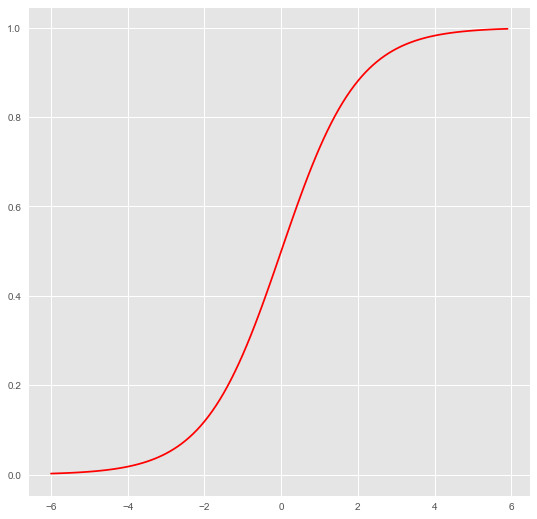

In [7]:
plt.figure(figsize=(9,9))

def sigmoid(t):                          # Define the sigmoid function
    return (1/(1 + np.e**(-t)))    

plot_range = np.arange(-6, 6, 0.1)       

y_values = sigmoid(plot_range)

# Plot curve
plt.plot(plot_range,   # X-axis range
         y_values,          # Predicted values
         color="red")

# Familiarize yourself with the IRIS dataset again  


In [8]:
# Load dataset
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
iris = pd.read_csv("files/iris.data", names=names)
iris.head()

sepal-length  sepal-width  petal-length  petal-width        class
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa

In [9]:
# insert code here to Describe the data 
iris.describe()

sepal-length  sepal-width  petal-length  petal-width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000

C:\Users\Steve\Anaconda3\lib\site-packages\seaborn\categorical.py:2171: UserWarning: The boxplot API has been changed. Attempting to adjust your arguments for the new API (which might not work). Please update your code. See the version 0.6 release notes for more info.
  warnings.warn(msg, UserWarning)


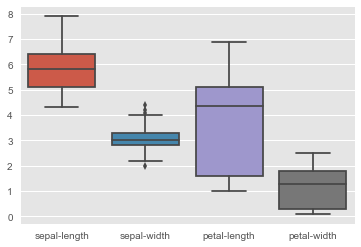

In [12]:
# insert code here Visualize it using a Seaborn (sns) box plot 
sns.boxplot(iris)
 

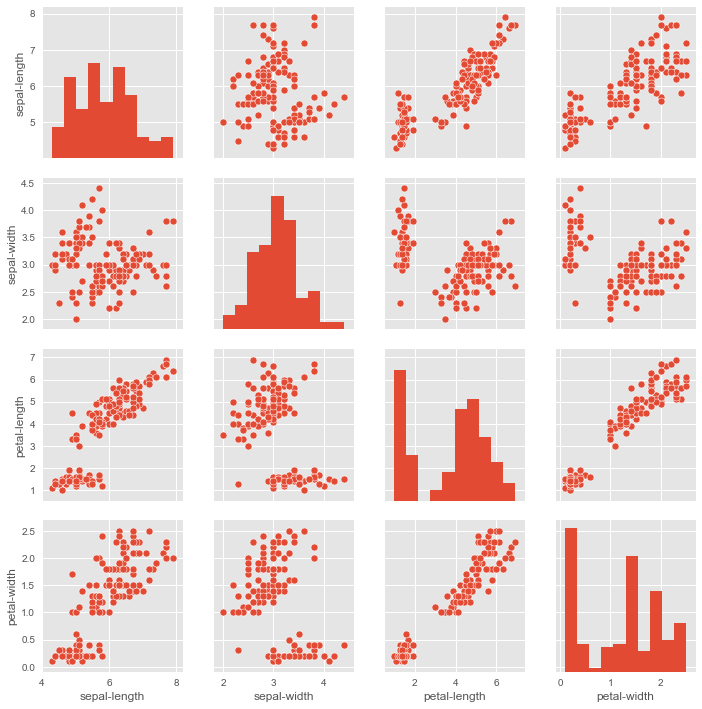

In [15]:
# Produce a scatterplot series of charts of the data using seaborn to explore the relationships between the variables
sns.pairplot(iris)
  

This shows us that the species are quite well separated into clusters based on their measurements. This is the case with all the combinations except when plotting sepal length and sepal width. These are slightly more difficult to separate. Whilst the Setosa species in this graph is less clustered as it’s other graphs, Versicolor and Virginica are quite well mixed together here making it much more difficult to tell one group from the other individually.​


We can deduce from these plot table that on average, Setosa petal lengths and widths are much smaller than that of Versicolor and Virginica. Though Virginica do have the biggest petal dimensions on average. We can see that on average, the sepal lengths are quite close in size, however, Setosa have noticeably bigger sepal widths than the other species. These plots tells us that the Setosa species have some distinctive features. 

You can see a pretty strong linear relationship between petal-length and petal-width. 

So next fit a linear regression on petal-length and petal-width. 

In [27]:
# insert code here
X = iris[["petal-length"]]
y = iris["petal-width"] 

# insert code here to fit a regression model  
model=linear_model.LinearRegression()
model=model.fit(X,y)
y_hat=model.predict(X)

# insert code here to show the performance of the model
print ('intercept is:', model.intercept_)
print ('coefficient is:', model.coef_)
print ('MSE:', metrics.mean_squared_error(y_hat,y))

intercept is: -0.366514045217
coefficient is: [ 0.41641913]
MSE: 0.0422899463195


Checkpoint 1 Summary of Linear Regression Model

# A Logistic Regression Model : IRIS DATA

Now use the LogisticRegression model imported in step 1 "sklearn.linear_model import LogisticRegression" to produce metrics for the model


In [34]:
#Logistic Regression  
model = LogisticRegression()
#select columns for the model 
X = iris[['petal-length', 'petal-width','sepal-length','sepal-width']]
#select the target labels
y_true = iris['class']

#Insert code here to fit a logistic regression model to the data
model = LogisticRegression()
log_reg=model.fit(X,y_true)

#Insert code here to make predictions
y_pred = log_reg.predict(X)
print (y_pred)

#Insert code here to summarize rhe fit of the model
from sklearn.metrics import confusion_matrix
print (confusion_matrix(y_pred,y_true))

['Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor

Checkpoint 2 Confusion Matrix and model output

In [35]:
# You might like to make use of this function
# An example of plotting the confusion matrix based on the code in 
# http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
import itertools
def plot_confusion_matrix(y_true, y_pred,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function plots the confusion matrix given
    the true and predicted labels from a model.
    Normalization can be applied by setting `normalize=True`.
    """
    classes = y_true.unique()
    cm = metrics.confusion_matrix(y_true, y_pred, labels=classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
None


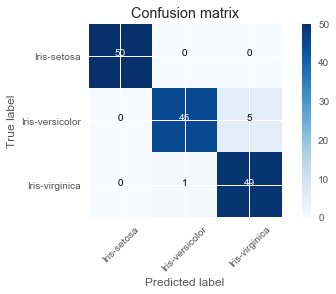

In [36]:
print(plot_confusion_matrix(y_true,y_pred))